### Experimento 1

#### Descrição do experimento

Neste primeiro experimento o CCScore será executado sobre o conjunto de redações e faremos uma avaliação direta do valor obtido, com os valores da Competência 4 do conjunto de redações. 

Deseja-se avaliar se o cálculo do índice de coesão utilizado em Nobre (2011) pode ser suficiente para determinar o valor da coesão das redações. Para isso faremos uma comparação direta dos valores e as diferenças absolutas entre os valores obtidos serão considerados.

### Dados do conjunto de redações utilizados

O dataset de redações foi obtido a partir dos arquivos de redações do projeto BrasilEscola. 

As competência de maneira resumida, avaliam os seguintes aspectos da redação:
<pre>
Ortografia        ==  Competência 1
Adequação ao tema ==  Competência 2
Coerência         ==  Competência 3
Coesão            ==  Competência 4
Ética             ==  Competência 5
</pre>

O que é esperado de cada competência:
<ul>
<li><strong>Competência 1</strong>: Demonstrar domínio da norma culta da língua escrita.</li>   
<li><strong>Competência 2</strong>: Compreender a proposta da redação e aplicar conceito das várias áreas de conhecimento para desenvolver o tema, dentro dos limites estruturais do texto dissertativo-argumentativo.</li>
<li><strong>Competência 3</strong>: Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos em defesa de um ponto de vista.</li>
<li><strong>Competência 4</strong>: Demonstrar conhecimento dos mecanismos linguísticos necessários para a construção da argumentação.</li>
<li><strong>Competência 5</strong>: Elaborar a proposta de solução para o problema abordado, mostrando respeito aos valores humanos e considerando a diversidade sociocultural.</li>
</ul>

In [3]:
import sys
sys.path.append('../ccscore/')

import spacy
import pandas as pd
import pickle
import matplotlib
from infernal import feature_extraction as fe
from infernal import datastructures as ds
import confapp as config
config.TEP2_PATH = "../ccscore/data/tep2.pickle"

import helper_palavras as h_pal 
from text_document import TextDocument

### Carga do conjunto de dados da redações

As colunas contém:

<ol>
    <li>Texto: Texto original da redação. </li>
    <li>Nota: Nota total da redação (0-1000), considerando as 5 competências. </li>
    <li>Competência 1: Nota da Competência 1 (0-200)</li>
    <li>Competência 2: Nota da Competência 2 (0-200)</li>
    <li>Competência 3: Nota da Competência 3 (0-200)</li>
    <li>Competência 4: Nota da Competência 4 (0-200)</li>
    <li>Competência 5: Nota da Competência 5 (0-200)</li>
    <li>Qtd palavras:  Quantidade de palavras do texto</li>
    <li>Cadeias: Cadeias de Correferência obtidas com o CORP</li>
    <li>Palavras: Anotações sintáticas e semânticas do parser PALAVRAS</li>
    <li>Erros: Erros gramaticais encontrados pelo corretor CoGroo</li>
    <li>Entidades: Entidades detectadas pelo processo de vinculação de entidades</li>
    <li>Coesão Calculada: Valor da coesão calculada pelo CCScore</li>
<ol>

In [4]:
PATH_CORPUS = "../ccscore/data/Corpus_Redacoes.pickle"

# Carrega a base de redações
df_redacao = pickle.load(open(PATH_CORPUS, 'rb'))
df_redacao

,Texto,Nota,Correção,Competência 1,Competência 2,Competência 3,Competência 4,Competência 5,Qtd palavras,Cadeias,Palavras,Erros,Entidades,Coesão Calculada
0,"Jornais, novelas e anúncios publicitários, a t...",700.0,"Jornais, novelas e anúncios publicitários, a t...",150.0,150.0,150.0,150.0,100.0,333,"{'Cadeia_1': {'sn': [OrderedDict([('@id', '2')...",\nJornais \t[jornal] <*> <sem-r> N M P @TOP #...,[[xml:118] Verificou-se erro de concordância e...,"{'TV': {'label': 16544881809274863474, 'kb_id'...",150.00
1,"Em Abril de 2011, um crime sem escrúpulos choc...",450.0,"Em abril de 2011, um crime sem escrúpulos choc...",100.0,100.0,50.0,100.0,100.0,328,"{'Cadeia_1': {'sn': [OrderedDict([('@id', '1')...",\nEm \t[em] <*> PRP @ADVL> #1->10\nAbril \t[a...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'Abril de 2011': {'label': 383, 'kb_id': '', ...",100.00
2,A proibição ou permissão de fumantes em locais...,800.0,A proibição ou permissão de fumantes em locais...,150.0,200.0,150.0,150.0,150.0,323,"{'Cadeia_5': {'sn': [OrderedDict([('@id', '6')...",\nA \t[o] <*> <artd> DET F S @>N #1->2\nproib...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'de São Paulo': {'label': 385, 'kb_id': 'Q175...",150.00
3,"Em Abril de 2011, um crime sem escrúpulos choc...",450.0,"Em abril de 2011, um crime sem escrúpulos choc...",100.0,100.0,50.0,100.0,100.0,328,"{'Cadeia_1': {'sn': [OrderedDict([('@id', '1')...",\nEm \t[em] <*> PRP @ADVL> #1->10\nAbril \t[a...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'Abril de 2011': {'label': 383, 'kb_id': '', ...",100.00
4,"Política, uma palavra que pode ter uma definiç...",500.0,"Política, uma palavra que pode ter uma definiç...",100.0,100.0,100.0,100.0,100.0,255,"{'Cadeia_10': {'sn': [OrderedDict([('@id', '10...",\nPolítica \t[político] <*> ADJ F S @PRED> #1...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'Política': {'label': 16544881809274863474, '...",100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,"O toque de recolher, à noite, imposto aos jove...",750.0,"O toque de recolher, à noite, imposto aos jove...",100.0,150.0,150.0,150.0,200.0,291,"{'Cadeia_0': {'sn': [OrderedDict([('@id', '0')...",\nO \t[o] <clb> <*> <artd> DET M S @>N #1->2\...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'anos': {'label': 16544881809274863474, 'kb_i...",70.71
2596,As manifestações populares podem contribuir pa...,750.0,As manifestações populares podem contribuir pa...,150.0,150.0,150.0,150.0,150.0,312,"{'Cadeia_0': {'sn': [OrderedDict([('@id', '0')...",\nAs \t[o] <*> <artd> DET F P @>N #1->2\nmani...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'Presidente': {'label': 7654241940133152407, ...",70.61
2597,Anualmente as universidades brasileiras concen...,650.0,Anualmente as universidades brasileiras concen...,150.0,150.0,100.0,150.0,100.0,265,"{'Cadeia_0': {'sn': [OrderedDict([('@id', '0')...",\nAnualmente \t[anualmente] <*> ADV @ADVL> #1...,[[probs:paronyms] Possível confusão entre divi...,"{'negros': {'label': 16544881809274863474, 'kb...",70.54
2598,"A cada período eleitoral, surgem campanhas de ...",750.0,"A cada período eleitoral, surgem campanhas de ...",150.0,150.0,150.0,150.0,150.0,345,"{'Cadeia_2': {'sn': [OrderedDict([('@id', '2')...",\nA \t[a] <*> PRP @ADVL> #1->6\ncada \t[cada]...,[[punctuation:BEFORE_SENTENCES] Pontuação no i...,"{'Constituição velha': {'label': 383, 'kb_id':...",70.51


In [3]:
def exibe_redacao(num_redacao):    
    texto = df_redacao['Texto'][num_redacao]
    anot_pal = df_redacao['Palavras'][num_redacao]
    nota_compt4 = df_redacao['Competência 4'][num_redacao]
    coesao_calculada = df_redacao['Coesão Calculada'][num_redacao]

    print(f"Num.: {num_redacao}\nCompetência 4: {nota_compt4} - Coesão Calculada: {coesao_calculada}\n")
    print(texto)


O resultado a seguir mostra que o avaliador automático não atribuiu nota zero para nenhuma das redações. Diferentemento do avaliador que em algumas situações atribuiu esse valor. 

In [4]:
print(f"Notas 0.0 atribuídas pelo corretor automático: {len(df_redacao[df_redacao['Coesão Calculada'] == 0.0])}")
print(f"Notas 0.0 atribuídas pelo corretor humano: {len(df_redacao[df_redacao['Competência 4'] == 0.0])}")

Notas 0.0 atribuídas pelo corretor automático: 0
Notas 0.0 atribuídas pelo corretor humano: 47


A seguir calcula-se a diferença entre o valor da coesão calculada pelo CCScore e a nota dada peloa avaliador humano, bem como o valor da diferença absoluta. 

In [5]:
df_redacao['diferenca'] = df_redacao['Competência 4'] - df_redacao['Coesão Calculada']
df_redacao['diferenca_abs'] = abs(df_redacao['diferenca'])

In [6]:
df_redacao[['Competência 4','Coesão Calculada', 'diferenca', 'diferenca_abs']]


,Competência 4,Coesão Calculada,diferenca,diferenca_abs
0,150.0,150.00,0.00,0.00
1,100.0,100.00,0.00,0.00
2,150.0,150.00,0.00,0.00
3,100.0,100.00,0.00,0.00
4,100.0,100.00,0.00,0.00
...,...,...,...,...
2595,150.0,70.71,79.29,79.29
2596,150.0,70.61,79.39,79.39
2597,150.0,70.54,79.46,79.46
2598,150.0,70.51,79.49,79.49


#### Distribuição das Notas da redações

<AxesSubplot:ylabel='Frequency'>

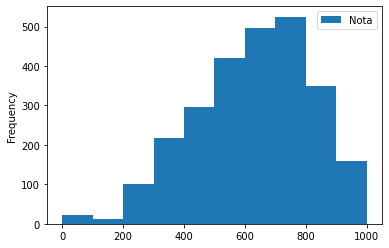

In [7]:
df_redacao[['Nota']].plot.hist()

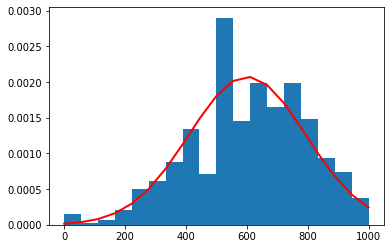

In [23]:
s = df_redacao[['Nota']].values
count, bins, ignored = plt.hist(s, 18, density=True)
mu, sigma = s.mean(), s.std() # mean and standard deviation

# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [25]:
#Python code
#Example ofD’Agostino’s K-squared Test
from scipy.stats import normaltest
data = df_redacao[['Nota']].values
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Data follows normal')
else:
 print('Data does not follow normal')
#OUTPUT:
#stat=3.392, p=0.183
#Data follows normal

stat=82.781, p=0.000
Data does not follow normal


In [39]:
from scipy.stats import anderson
data = list(zip(*df_redacao[['Nota']].values))
result = anderson(data[0])
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
 sl, cv = result.significance_level[i], result.critical_values[i]
 if result.statistic < cv:
  print('Data follows Normal at the %.1f%% level' % (sl))
 else:
  print('Data does not follows Normal at the %.1f%% level' % (sl))

stat=21.692
Data does not follows Normal at the 15.0% level
Data does not follows Normal at the 10.0% level
Data does not follows Normal at the 5.0% level
Data does not follows Normal at the 2.5% level
Data does not follows Normal at the 1.0% level


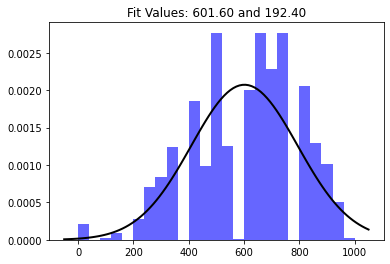

In [26]:
# Generate some data for this 
# demonstration.
data = df_redacao[['Nota']].values
  
# Fit a normal distribution to
# the data: mean and standard deviation
mu, std = norm.fit(data) 
  
# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
  
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()

#### Distribuição das Notas da Competência 4 das redações

<AxesSubplot:ylabel='Frequency'>

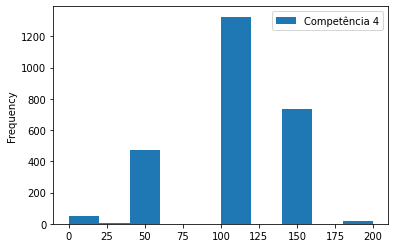

In [44]:
df_redacao[['Competência 4']].plot.hist()

#### Distribuição dos valores calculados de coesão

<AxesSubplot:ylabel='Frequency'>

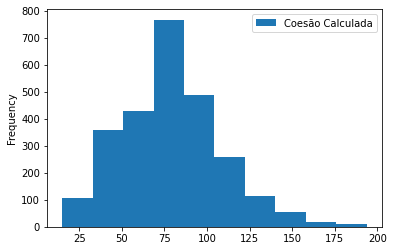

In [45]:
df_redacao[['Coesão Calculada']].plot.hist()

#### Avaliação das diferenças absolutas entre a Coesão Calculada e os valores da Competência 4 atribuidos pelo avaliador

A seguir temos uma distribuição dos valores absolutos da diferença entre os valores atribuidos pelos corretores humanos e o processo avaliação automática. 


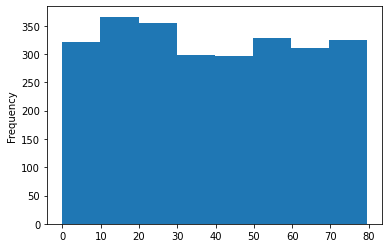

In [50]:
ax = df_redacao['diferenca_abs'].plot.hist(bins = 8)


O valor absoluto da diferença média entre a nota do avaliador humano e a avaliação automática foi de 39 pontos, com desvio-padrão de 23,09. Enquanto o desvio-padrão apresentado pelo avaliador humano foi de 103,95.
A diferença máxima da diferença absoluta foi de 79,49 pontos. 
Chama a atenção do fato da avaliação automática não ter atribuído nota 0 (zero) a nenhuma redação. Diferentemente do avaliador humano e não ter dado nota máxima a nenhuma redação. Possivelmente, isso pode se dar por conta de aspectos da coesão que avaliação automática não esteja considerando ou que não possam ser capturados pelo método.

In [53]:
df_redacao[['Competência 4','Coesão Calculada', 'diferenca_abs']].describe()

,Competência 4,Coesão Calculada,diferenca_abs
count,2600.000000,2600.000000,2600.000000
mean,103.957692,79.136015,38.996115
std,37.421588,29.153928,23.092161
min,0.000000,15.000000,0.000000
25%,100.000000,58.930000,18.750000
50%,100.000000,77.780000,38.540000
75%,150.000000,95.830000,59.110000
max,200.000000,193.750000,79.490000


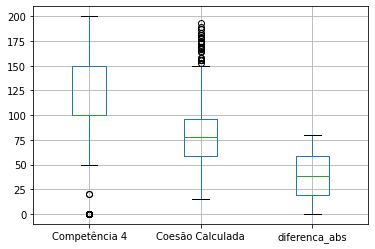

In [55]:
boxplot = df_redacao.boxplot(column=['Competência 4', 'Coesão Calculada', 'diferenca_abs'])

In [56]:
dif_zero = df_redacao[df_redacao['diferenca'] == 0.0]
print(f"Total de linhas: {dif_zero.shape[0]}")
dif_zero


Total de linhas: 31


,Texto,Nota,Correção,Competência 1,Competência 2,Competência 3,Competência 4,Competência 5,Qtd palavras,Cadeias,Palavras,Erros,Entidades,Coesão Calculada,diferenca,diferenca_abs
0,"Jornais, novelas e anúncios publicitários, a t...",700.0,"Jornais, novelas e anúncios publicitários, a t...",150.0,150.0,150.0,150.0,100.0,333,"{'Cadeia_1': {'sn': [OrderedDict([('@id', '2')...",\nJornais \t[jornal] <*> <sem-r> N M P @TOP #...,[[xml:118] Verificou-se erro de concordância e...,"{'TV': {'label': 16544881809274863474, 'kb_id'...",150.0,0.0,0.0
1,"Em Abril de 2011, um crime sem escrúpulos choc...",450.0,"Em abril de 2011, um crime sem escrúpulos choc...",100.0,100.0,50.0,100.0,100.0,328,"{'Cadeia_1': {'sn': [OrderedDict([('@id', '1')...",\nEm \t[em] <*> PRP @ADVL> #1->10\nAbril \t[a...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'Abril de 2011': {'label': 383, 'kb_id': '', ...",100.0,0.0,0.0
2,A proibição ou permissão de fumantes em locais...,800.0,A proibição ou permissão de fumantes em locais...,150.0,200.0,150.0,150.0,150.0,323,"{'Cadeia_5': {'sn': [OrderedDict([('@id', '6')...",\nA \t[o] <*> <artd> DET F S @>N #1->2\nproib...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'de São Paulo': {'label': 385, 'kb_id': 'Q175...",150.0,0.0,0.0
3,"Em Abril de 2011, um crime sem escrúpulos choc...",450.0,"Em abril de 2011, um crime sem escrúpulos choc...",100.0,100.0,50.0,100.0,100.0,328,"{'Cadeia_1': {'sn': [OrderedDict([('@id', '1')...",\nEm \t[em] <*> PRP @ADVL> #1->10\nAbril \t[a...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'Abril de 2011': {'label': 383, 'kb_id': '', ...",100.0,0.0,0.0
4,"Política, uma palavra que pode ter uma definiç...",500.0,"Política, uma palavra que pode ter uma definiç...",100.0,100.0,100.0,100.0,100.0,255,"{'Cadeia_10': {'sn': [OrderedDict([('@id', '10...",\nPolítica \t[político] <*> ADJ F S @PRED> #1...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,"{'Política': {'label': 16544881809274863474, '...",100.0,0.0,0.0
5,Com uma educação de qualidade e disciplina exe...,300.0,Com uma educação de qualidade e disciplina exe...,50.0,100.0,50.0,50.0,50.0,263,"{'Cadeia_0': {'sn': [OrderedDict([('@id', '0')...",\nCom \t[com] <*> PRP @ADVL> @PRED> #1->15\nu...,[[xml:117] Verificou-se erro de concordância e...,"{'lugar': {'label': 16544881809274863474, 'kb_...",50.0,0.0,0.0
6,A história do Brasil é marcada pela discrição ...,450.0,A história do Brasil é marcada pela discrição ...,100.0,150.0,100.0,50.0,50.0,304,"{'Cadeia_1': {'sn': [OrderedDict([('@id', '1')...",\nA \t[o] <*> <artd> DET F S @>N #1->2\nhistó...,[[xml:117] Verificou-se erro de concordância e...,"{'Brasil': {'label': 385, 'kb_id': 'Q155', 'ca...",50.0,0.0,0.0
7,Os chamados Rolezinhos acontecem por todo o pa...,650.0,Os chamados Rolezinhos acontecem por todo o pa...,150.0,100.0,150.0,150.0,100.0,259,"{'Cadeia_4': {'sn': [OrderedDict([('@id', '4')...",\nOs \t[o] <*> <artd> DET M P @>N #1->3\ncham...,[[xml:124] O adjetivo na função de predicativo...,"{'Rolezinhos': {'label': 385, 'kb_id': 'Q18482...",150.0,0.0,0.0
8,"No trabalho, em casa e na escola acontecem eve...",400.0,"No trabalho, em casa e na escola acontecem eve...",100.0,100.0,50.0,100.0,50.0,296,"{'Cadeia_0': {'sn': [OrderedDict([('@id', '0')...",\nEm \t[em] <cjt-head> <*> <sam-> PRP @ADVL> ...,[[space:EXTRA_BEFORE_RIGHT_PUNCT] Excesso de e...,{'Costa Concordia': {'label': 4317129024397789...,100.0,0.0,0.0
9,No Brasil o horário político surgiu no ano de ...,350.0,No Brasil o horário político surgiu no ano de ...,100.0,100.0,50.0,50.0,50.0,254,"{'Cadeia_0': {'sn': [OrderedDict([('@id', '0')...",\nEm \t[em] <*> <sam-> PRP @ADVL> #1->7\no \t...,[[xml:117] Verificou-se erro de concordância e...,"{'Brasil': {'label': 385, 'kb_id': 'Q155', 'ca...",50.0,0.0,0.0


### Visualização de uma instância

In [62]:
exibe_redacao(939)

Num.: 939
Competência 4: 100.0 - Coesão Calculada: 127.08

A bebida alcoólica pertence ao grupo das drogas lícitas mais vendidas no Brasil, segundo uma pesquisa feita nas escolas de São Paulo, jovens menores de dezoito anos já se embriagaram ao menos uma vez e esse índice vem crescendo por alguns motivos como: convívio com a bebida desde cedo na família, falta de informação sobre as conseqüências do uso tão cedo e, além do mais, o fato de adquirir o produto fora da idade permitida por lei.
Desde a infância somos criados em meio a festas em que todos os familiares fazem uso da bebida alcoólica passando uma imagem divertida e legal e depois que saímos da infância e entramos na adolescência começamos a fazer o uso da bebida sem nos dar conta dos malefícios, levando o consumo como um ato comum.
Além do mais, a falta de informação explícita sobre as conseqüências do uso do álcool tão cedo  são poucas em relação às outras drogas lícitas como o cigarro, não fazendo disso um assunto totalmente

In [1]:
num_redacao = 938
texto = df_redacao['Texto'][num_redacao]
anot_pal = df_redacao['Palavras'][num_redacao]
tp = h_pal.parse_text_toclass(anot_pal, texto)
td = TextDocument(texto, tp)

NameError: name 'df_redacao' is not defined

In [70]:
from itertools import combinations
from itertools import tee
import matplotlib.pyplot as plt
import numpy as np

In [68]:
def plot_coesao_local(td):
    
    fig, ax = plt.subplots()    
    y = td.local_cohesion_values
    x = [a+1 for a in list(range(len(td.local_cohesion_values)))]
    plt.ylim(0.0, 1.1)
    plt.yticks(np.arange(0, 1.5, 0.5))
    plt.xticks(np.arange(0, len(x)+1, 1.0))
    plt.xlabel("Pares de Sentenças")
    plt.ylabel("Valores Coesão Local")
    plt.plot(x, y, 'go-')
    
    a,b = tee(list(range(len(td.sentences))))
    next(b)
    pares_sentencas = list(zip(a,b))
    for i, p in enumerate(list(zip(x,y))):
        px, py = p
        ax.annotate(f"{pares_sentencas[i]}", xy=(px,py),
                    textcoords="offset points", 
                     xytext=(3,-15),
                     ha='center')

In [66]:
def plot_coesao_global(td): 
    
    fig, ax = plt.subplots()    
    y = td.global_cohesion_values
    x = [a+1 for a in list(range(len(td.global_cohesion_values)))]
    plt.ylim(0.0, 1.1)
    plt.yticks(np.arange(0, 1.5, 0.5))
    plt.xticks(np.arange(0, len(td.global_cohesion_values)+1, 1.0))
    plt.xlabel("Pares de Parágrafos")
    plt.ylabel("Valores Coesão Global")
    plt.plot(x, y, 'go-')
    
    pares_paragraphs = list(combinations(list(range(len(td.paragraphs))),2))
    for i, p in enumerate(list(zip(x,y))):
        px, py = p
        ax.annotate(f"{pares_paragraphs[i]}", xy=(px,py),
                    textcoords="offset points", 
                     xytext=(3,-15),
                     ha='center')

#### Exibição do valores calculados para a coesão entre os pares de parágrafos (coesão global)

São analisados todos os pares de parágrafos. Se um texto tiver 4 parágrafos, serão analisados os seguintes pares.
(1,2)(1,3)(1,4)
(2,3)(2,4)
(3,4)
Sendo atribuída uma nota para relaão entre os pares, de acordo com os seguintes valores:
<ul>
    <li>Elaboração: 1,00</li>
    <li>Manutenção de Tópico: 0,75</li>
    <li>Mudança de Tópico: 0,50</li>
    <li>Mudança de Assunto: 0,00</li>
</ul>  

Total de parágrafos: 5


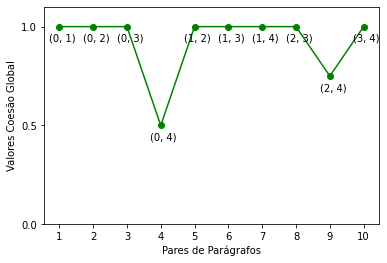

In [71]:
print(f"Total de parágrafos: {len(td.paragraphs)}")
plot_coesao_global(td)

#### Exibição do valores calculados para a coesão entre os pares de sentenças (coesão local)

São analisados todos os pares de sentenças de forma sequenciada. Se um texto tiver 4 sentenças, serão analisados os seguintes pares.
(1,2)(2,3)(3,4)

Sendo atribuída uma nota para relaão entre os pares, de acordo com os seguintes valores:
<ul>
    <li>Elaboração: 1,00</li>
    <li>Manutenção de Tópico: 0,75</li>
    <li>Mudança de Tópico: 0,50</li>
    <li>Mudança de Assunto: 0,00</li>
</ul>  

Total de sentenças: 6


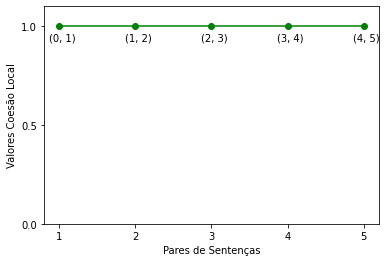

In [73]:
print(f"Total de sentenças: {len(td.sentences)}")
plot_coesao_local(td)

A redação indicada acima, recebeu as seguintes notas:

Competência 4 (avaliador humano): 100.0
Coesão Calculada (avaliação automática): 127.08 

Podemos ver pela relações entre as sentenças que houve um processo de elaboração contínua nas transições entre as sentenças. O que pode indicar que os parágrafos não foram utilizados de forma a introduzir novos tópicos ou que a argumentação não tenha evoluído. Analisando o relacionamento entre os parágrafos, percebemos uma mudança de tópico entre o 1º parágrafo e o último (4º). Quando, em um texto dissertativo de bem redigido, espera-se um processo de retomada do tópico, enquanto nos anteriores ao último deva ocorrer um processo de elaboração e mudança. 

In [74]:
exibe_redacao(939)

Num.: 939
Competência 4: 100.0 - Coesão Calculada: 127.08

A bebida alcoólica pertence ao grupo das drogas lícitas mais vendidas no Brasil, segundo uma pesquisa feita nas escolas de São Paulo, jovens menores de dezoito anos já se embriagaram ao menos uma vez e esse índice vem crescendo por alguns motivos como: convívio com a bebida desde cedo na família, falta de informação sobre as conseqüências do uso tão cedo e, além do mais, o fato de adquirir o produto fora da idade permitida por lei.
Desde a infância somos criados em meio a festas em que todos os familiares fazem uso da bebida alcoólica passando uma imagem divertida e legal e depois que saímos da infância e entramos na adolescência começamos a fazer o uso da bebida sem nos dar conta dos malefícios, levando o consumo como um ato comum.
Além do mais, a falta de informação explícita sobre as conseqüências do uso do álcool tão cedo  são poucas em relação às outras drogas lícitas como o cigarro, não fazendo disso um assunto totalmente

#### Valor QWK

In [5]:
import qwk
import numpy as np

compt4 = df_redacao['Competência 4'].values.astype(dtype=np.int16)
coesao_calc = df_redacao['Coesão Calculada'].values.astype(dtype=np.int16)

qwk_value = qwk.quadratic_weighted_kappa(compt4.tolist(), coesao_calc.tolist())

print(f"QWK: {round(qwk_value,3)}")

QWK: 0.281


#### Valor RSME

In [7]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse_value = mean_squared_error(compt4, coesao_calc)    
rmse_value = sqrt(mse_value)

print(f"MSE: {round(mse_value,2)} \n RMSE: {round(rmse_value,2)}")

MSE: 2077.12 
 RMSE: 45.58
